In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [48]:
md = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/soft_label.tsv', sep='\t', index_col=0)

In [49]:
# import data
brca_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/soft_label.tsv', sep='\t', index_col=0)
rnaseq_df = pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/tcga.brca.rnaseq.unstranded.fpkm.counts.matrix.txt', sep='\t', index_col=0)

# Drop rows where event.BRCA1 is '1'
brca_df_filtered = brca_df[brca_df['event.BRCA1'] != '1']

# Drop rows where event.BRCA2 is 'Bi-allelic-undetermined'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.BRCA2'] != 'Bi-allelic-undetermined']

# Drop rows where event.PALB2 is '2'
brca_df_filtered = brca_df_filtered[brca_df_filtered['event.PALB2'] != '2']

# keep common samples

#idenfity the common samples

# Extract sample IDs from each dataframe
rnaseq_samples = set(rnaseq_df['Case ID'])
brca_samples = set(brca_df_filtered.index)

# Find the intersection of all sample IDs
common_samples = rnaseq_samples.intersection(brca_samples)

# Print the number of common samples
print("\nNumber of common samples:", len(common_samples))

# Drop samples that are not common in all three dataframes
rnaseq_df_common = rnaseq_df[rnaseq_df['Case ID'].isin(common_samples)]
brca_df_common = brca_df_filtered[brca_df_filtered.index.isin(common_samples)]

# Print the shapes of the new dataframes
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)


Number of common samples: 811
rnaseq_df_common: (872, 60663)
brca_df_common: (811, 42)


In [50]:
# Check for duplicates in rnaseq_df_common's Case ID
print("Duplicate Case IDs in rnaseq_df:", rnaseq_df_common['Case ID'].duplicated().sum())

# Drop duplicates in rnaseq_df_common if any
rnaseq_df_common = rnaseq_df_common.drop_duplicates(subset=['Case ID'])

# Verify the shapes after removing duplicates
print("\nAfter removing duplicates:")
print("rnaseq_df_common:", rnaseq_df_common.shape)
print("brca_df_common:", brca_df_common.shape)

# Verify that we have exactly the same samples in both dataframes
rnaseq_samples = set(rnaseq_df_common['Case ID'])
brca_samples = set(brca_df_common.index)
print("\nSamples match:", rnaseq_samples == brca_samples)
print("Number of samples in each:", len(rnaseq_samples), len(brca_samples))

rnaseq_df_common.set_index('Case ID', inplace=True)
rnaseq_df_common.head()

Duplicate Case IDs in rnaseq_df: 61

After removing duplicates:
rnaseq_df_common: (811, 60663)
brca_df_common: (811, 42)

Samples match: True
Number of samples in each: 811 811


,Sample ID,Sample Type,ENSG00000000003.15|TSPAN6|protein_coding,ENSG00000000005.6|TNMD|protein_coding,ENSG00000000419.13|DPM1|protein_coding,ENSG00000000457.14|SCYL3|protein_coding,ENSG00000000460.17|C1orf112|protein_coding,ENSG00000000938.13|FGR|protein_coding,ENSG00000000971.16|CFH|protein_coding,ENSG00000001036.14|FUCA2|protein_coding,...,ENSG00000288661.1|AL451106.1|protein_coding,ENSG00000288662.1|AC092910.4|lncRNA,ENSG00000288663.1|AC073611.1|lncRNA,ENSG00000288665.1|AC136977.1|lncRNA,ENSG00000288667.1|AC078856.1|lncRNA,ENSG00000288669.1|AC008763.4|protein_coding,ENSG00000288670.1|AL592295.6|lncRNA,ENSG00000288671.1|AC006486.3|protein_coding,ENSG00000288674.1|AL391628.1|protein_coding,ENSG00000288675.1|AP006621.6|protein_coding
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-E9-A1RH,TCGA-E9-A1RH-01A,Primary Tumor,1.0276,0.0000,74.2709,1.3816,1.6749,1.4166,5.2410,8.4782,...,0.0,0.0,0.0177,0.0,0.0,0.0000,1.8073,0.0,0.0000,0.1285
TCGA-C8-A26W,TCGA-C8-A26W-01A,Primary Tumor,13.2684,0.1250,37.9298,3.7360,3.1045,2.4799,7.4851,30.4546,...,0.0,0.0,0.0847,0.0,0.0,0.0036,3.4634,0.0,0.0074,0.3801
TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,Primary Tumor,14.8681,2.2172,27.8838,4.3170,1.7847,3.7167,9.6630,16.7889,...,0.0,0.0,0.0261,0.0,0.0,0.0000,3.2723,0.0,0.0058,0.2546
TCGA-BH-A0HO,TCGA-BH-A0HO-01A,Primary Tumor,0.8430,0.0798,22.1105,3.9971,0.9805,2.4742,3.8185,12.5473,...,0.0,0.0,0.0253,0.0,0.0,0.0000,3.1233,0.0,0.0041,0.4599
TCGA-BH-A18F,TCGA-BH-A18F-01A,Primary Tumor,10.1027,8.2031,29.6694,5.2897,3.2049,2.8792,10.0696,9.2545,...,0.0,0.0,0.0412,0.0,0.0,0.0000,5.5897,0.0,0.0067,0.6483


In [51]:

# Sort the samples in both dataframes by index
rnaseq_df_common = rnaseq_df_common.sort_index()
brca_df_common = brca_df_common.sort_index()

# Verify indices match exactly
indices_match = (rnaseq_df_common.index == brca_df_common.index).all()
print("\nIndices match exactly:", indices_match)



Indices match exactly: True


In [52]:
print(brca_df_common.shape)
brca_df_common.head()

(811, 42)


,HRD,Telomeric AI,LST,HRD-sum,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,BRCA1_mRNA,...,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC,HRD_status_base,HRD_adjust,soft prob,soft_prob,Confidence
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,0,0,0,0,0,0,0.0,0,0,0,...,0,0,0,NaN,0,HR,HRP,0.00000,0.00000,0.002473
TCGA-A1-A0SD,10,10,7,27,0,0,0.0,0,0,0,...,0,0,0,LumA,0,HR,HRP ambiguous,0.48875,0.48875,0.354344
TCGA-A1-A0SE,6,6,1,13,0,0,0.0,0,0,0,...,0,0,0,LumA,0,HR,HRP ambiguous,0.13875,0.13875,0.032295
TCGA-A1-A0SF,7,11,8,26,0,0,0.0,0,0,0,...,0,0,0,LumA,0,HR,HRP ambiguous,0.48000,0.48000,0.310026
TCGA-A1-A0SG,3,2,4,9,0,0,0.0,0,0,0,...,0,0,0,LumA,0,HR,HRP,0.00000,0.00000,0.014774


In [53]:
print(rnaseq_df_common.shape)
rnaseq_df_common.head()

(811, 60662)


,Sample ID,Sample Type,ENSG00000000003.15|TSPAN6|protein_coding,ENSG00000000005.6|TNMD|protein_coding,ENSG00000000419.13|DPM1|protein_coding,ENSG00000000457.14|SCYL3|protein_coding,ENSG00000000460.17|C1orf112|protein_coding,ENSG00000000938.13|FGR|protein_coding,ENSG00000000971.16|CFH|protein_coding,ENSG00000001036.14|FUCA2|protein_coding,...,ENSG00000288661.1|AL451106.1|protein_coding,ENSG00000288662.1|AC092910.4|lncRNA,ENSG00000288663.1|AC073611.1|lncRNA,ENSG00000288665.1|AC136977.1|lncRNA,ENSG00000288667.1|AC078856.1|lncRNA,ENSG00000288669.1|AC008763.4|protein_coding,ENSG00000288670.1|AL592295.6|lncRNA,ENSG00000288671.1|AC006486.3|protein_coding,ENSG00000288674.1|AL391628.1|protein_coding,ENSG00000288675.1|AP006621.6|protein_coding
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,TCGA-A1-A0SB-01A,Primary Tumor,19.6132,8.7767,21.2168,3.1036,1.2107,0.7039,24.3075,5.9890,...,0.0,0.0,0.0903,0.0,0.0,0.0,2.5875,0.0,0.0245,0.3319
TCGA-A1-A0SD,TCGA-A1-A0SD-01A,Primary Tumor,9.2472,0.5736,38.9326,3.5182,1.0637,2.0629,10.4956,20.2043,...,0.0,0.0,0.0743,0.0,0.0,0.0,3.2987,0.0,0.0035,0.1915
TCGA-A1-A0SE,TCGA-A1-A0SE-01A,Primary Tumor,18.7699,0.2720,21.6648,4.2998,3.6655,1.0240,5.9898,7.6596,...,0.0,0.0,0.0470,0.0,0.0,0.0,5.7125,0.0,0.0052,0.2988
TCGA-A1-A0SF,TCGA-A1-A0SF-01A,Primary Tumor,42.0744,0.1293,28.5348,3.8915,1.6092,3.6183,7.2606,10.6490,...,0.0,0.0,0.0707,0.0,0.0,0.0,5.0936,0.0,0.0088,0.4040
TCGA-A1-A0SG,TCGA-A1-A0SG-01A,Primary Tumor,11.9388,0.0492,26.2437,2.6332,1.2095,1.9633,6.9818,13.6613,...,0.0,0.0,0.0541,0.0,0.0,0.0,4.7087,0.0,0.0075,0.5075


In [54]:
# filter to top 2 percent of differentially expressed genes
deseq_results=pd.read_csv('/Users/leojo/Developer/alexandrov_sd_proj/Multiscale_HRD_Classifier/prelim_analysis/data/deseq_bottom_2_percent.tsv', sep = '\t', index_col=0)



deseq_results.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000163975.12|MELTF|protein_coding,4.223192,2.197306,0.122265,17.971715,3.245282e-72,6.764141e-68
ENSG00000115163.15|CENPA|protein_coding,4.405742,1.489792,0.087457,17.034565,4.551128e-65,4.742959e-61
ENSG00000107937.19|GTPBP4|protein_coding,13.539092,0.820738,0.048266,17.004536,7.600421e-65,5.280519e-61
ENSG00000136943.11|CTSV|protein_coding,2.170985,1.952020,0.120999,16.132475,1.508526e-58,7.860554e-55
ENSG00000140545.15|MFGE8|protein_coding,31.920965,1.701760,0.106421,15.990768,1.481928e-57,6.177567e-54


In [55]:

# Filter columns in rna_seq_df based on deseq_results row indices
deseq_filtered_rna_seq_df = rnaseq_df_common[[col for col in rnaseq_df_common.columns if col in deseq_results.index]]
print(deseq_filtered_rna_seq_df.shape)
deseq_filtered_rna_seq_df.head()

(811, 1213)


,ENSG00000001617.12|SEMA3F|protein_coding,ENSG00000003147.19|ICA1|protein_coding,ENSG00000003756.17|RBM5|protein_coding,ENSG00000004838.14|ZMYND10|protein_coding,ENSG00000005194.15|CIAPIN1|protein_coding,ENSG00000006016.11|CRLF1|protein_coding,ENSG00000006634.8|DBF4|protein_coding,ENSG00000006757.12|PNPLA4|protein_coding,ENSG00000007402.12|CACNA2D2|protein_coding,ENSG00000007541.17|PIGQ|protein_coding,...,ENSG00000276600.5|RAB7B|protein_coding,ENSG00000276644.5|DACH1|protein_coding,ENSG00000276855.1|AC015922.3|lncRNA,ENSG00000278133.1|AC135050.6|lncRNA,ENSG00000280798.1|LINC00294|lncRNA,ENSG00000284024.4|AC069544.2|protein_coding,ENSG00000284753.2|EEF1AKMT4|protein_coding,ENSG00000286379.1|AL591845.1|lncRNA,ENSG00000287262.1|AC021148.2|lncRNA,ENSG00000287906.1|AC127526.5|lncRNA
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,7.8663,7.8623,7.8030,0.4009,14.0492,4.3951,2.2078,8.1428,1.1502,3.3608,...,11.1254,0.1588,12.1538,10.7523,1.7906,4.8723,3.2997,0.1011,0.5217,3.1370
TCGA-A1-A0SD,24.8184,10.5286,7.1614,2.0750,9.9661,2.1346,2.2628,7.1141,5.1494,6.9667,...,1.9387,5.4586,10.5530,11.9837,2.6123,5.3365,2.2579,0.4235,0.8367,10.3663
TCGA-A1-A0SE,38.0192,11.1695,5.5681,10.0995,10.1232,0.8853,2.8181,14.9302,3.2442,10.4521,...,2.2013,11.9878,9.6260,11.3527,1.6852,4.8578,2.7283,8.5263,1.1637,6.1312
TCGA-A1-A0SF,23.9412,11.7136,4.5643,7.1280,12.0426,1.0293,3.9462,12.2298,2.7927,10.7767,...,1.1968,4.2133,10.9113,22.9191,1.9951,5.7305,4.7636,9.3214,16.1941,10.8740
TCGA-A1-A0SG,29.1906,8.0884,4.8486,14.2927,9.3097,0.9233,1.6741,10.0471,2.5005,24.5436,...,1.0828,1.5250,13.4883,39.7159,1.0481,3.0396,3.1632,5.0618,0.6275,5.2623


In [56]:
#Filter to top 2% of all protein genes
#drop non-protein coding genes

# Step 1: Filter for protein coding genes (from your original code)
columns_to_keep = ['Sample ID', 'Sample Type']
gene_columns = [col for col in rnaseq_df_common.columns if col not in columns_to_keep]
protein_coding_cols = [col for col in gene_columns if 'protein_coding' in col]
final_columns = columns_to_keep + protein_coding_cols
pcg_rnaseq_df_filtered = rnaseq_df_common[final_columns]


# Step 2: Calculate mean expression for each gene
# First, separate metadata columns from gene expression columns
gene_expression = pcg_rnaseq_df_filtered[protein_coding_cols]
metadata = pcg_rnaseq_df_filtered[columns_to_keep]


# Calculate mean expression for each gene
gene_means = gene_expression.mean(axis=0)

# Calculate number of genes to keep (top 2%)
n_genes_to_keep = 400

# Get the column names (genes) with highest mean expression
top_genes = gene_means.nlargest(n_genes_to_keep).index

# Create final dataframe with metadata and top genes
pcg_400_with_metadata = pd.concat([metadata, pcg_rnaseq_df_filtered[top_genes]], axis=1)

# Create final dataframe with only top genes
pcg_400 = pcg_rnaseq_df_filtered[top_genes]

# Print information about the filtering
print("Original number of protein coding genes:", len(protein_coding_cols))
print("Number of top genes kept (2%):", n_genes_to_keep)
print("\nDataframe shapes:")
print("Original:", rnaseq_df.shape)
print("After protein coding filter:", pcg_rnaseq_df_filtered.shape)
print("Final (with top 2% genes) with metadata:", pcg_400_with_metadata.shape)
print("Final (with top 2% genes):", pcg_400.shape)



# Optional: Show summary statistics of the mean expression values
print("\nMean expression summary for top genes:")
print(gene_means[top_genes].describe())

# Save results to new dataframe
rnaseq_df_top_genes = pcg_400

# Optional: verify that our key columns are still present
print("\nChecking if key columns are present:")
for col in columns_to_keep:
    print(f"{col} present: {col in rnaseq_df_top_genes.columns}")

Original number of protein coding genes: 19962
Number of top genes kept (2%): 400

Dataframe shapes:
Original: (1231, 60663)
After protein coding filter: (811, 19964)
Final (with top 2% genes) with metadata: (811, 402)
Final (with top 2% genes): (811, 400)

Mean expression summary for top genes:
count     400.000000
mean      338.162618
std       782.333528
min        82.098058
25%       105.246047
50%       136.786790
75%       246.344187
max      7164.470881
dtype: float64

Checking if key columns are present:
Sample ID present: False
Sample Type present: False


In [57]:
rnaseq_df_top_genes.head()

,ENSG00000198938.2|MT-CO3|protein_coding,ENSG00000198712.1|MT-CO2|protein_coding,ENSG00000198804.2|MT-CO1|protein_coding,ENSG00000198886.2|MT-ND4|protein_coding,ENSG00000198899.2|MT-ATP6|protein_coding,ENSG00000198727.2|MT-CYB|protein_coding,ENSG00000198840.2|MT-ND3|protein_coding,ENSG00000198888.2|MT-ND1|protein_coding,ENSG00000198763.3|MT-ND2|protein_coding,ENSG00000034510.6|TMSB10|protein_coding,...,ENSG00000152583.12|SPARCL1|protein_coding,ENSG00000171863.15|RPS7|protein_coding,ENSG00000138071.14|ACTR2|protein_coding,ENSG00000130726.12|TRIM28|protein_coding,ENSG00000112473.18|SLC39A7|protein_coding,ENSG00000186847.6|KRT14|protein_coding,ENSG00000072506.13|HSD17B10|protein_coding,ENSG00000173432.12|SAA1|protein_coding,ENSG00000128524.5|ATP6V1F|protein_coding,ENSG00000177469.13|CAVIN1|protein_coding
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,3858.5010,2734.3147,3214.7944,2999.6752,2011.0559,1832.5761,1752.5844,2216.3943,1598.3154,1058.2010,...,92.6630,181.5403,50.8789,93.4420,47.9391,213.1752,51.3243,30.9332,36.5908,149.9245
TCGA-A1-A0SD,6349.0923,5326.2092,8394.1997,4115.2592,3018.9851,2884.3892,1857.6399,3803.5931,2381.9281,1721.3446,...,168.9300,44.9335,90.3364,65.8008,75.4556,97.9839,59.6951,100.8164,59.1131,99.5780
TCGA-A1-A0SE,5127.8828,3724.7044,5720.3970,3730.2852,3435.2270,3327.4851,1557.5564,2567.3744,2136.5898,2694.0043,...,160.7200,83.2336,77.9826,88.1621,78.9526,79.7784,63.8818,34.8743,61.4540,95.6998
TCGA-A1-A0SF,10089.1721,6027.4926,8117.6257,4692.0740,3719.6566,4306.9768,3865.7119,4720.3426,3443.9748,2821.8854,...,135.9754,117.3202,62.2808,109.9597,69.4902,136.6895,87.3870,36.3222,79.5712,86.2987
TCGA-A1-A0SG,5312.6401,4419.4158,6177.0002,5688.6814,3356.9894,3047.4510,3362.2742,4143.3736,3290.6577,1409.1055,...,91.7647,48.7826,86.9157,82.8320,96.5583,19.4938,69.7787,12.1885,65.9022,65.8758


In [58]:
#files to use for training/testing

#top 2% of expressed protein coding genes
rnaseq_df_top_genes.head()
print(rnaseq_df_top_genes.shape)

#top 2% of differentially expressed genes
deseq_filtered_rna_seq_df.head()
print(deseq_filtered_rna_seq_df.shape)

#metadata with soft labels
brca_df_common.head()
print(brca_df_common.shape)


(811, 400)
(811, 1213)
(811, 42)


In [59]:
brca_df_common['Confidence'].value_counts()

Confidence
0.014774    29
0.012128    28
0.006693    27
0.032295    24
0.005486    24
            ..
0.999989     1
0.999254     1
0.999970     1
0.999991     1
0.999983     1
Name: count, Length: 88, dtype: int64

In [60]:
brca_df_common['HRD_status_base'].value_counts()

HRD_status_base
HR     612
HRD    199
Name: count, dtype: int64

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, mean_squared_error, r2_score, f1_score, recall_score, precision_score, matthews_corrcoef
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


Training models on top 2% expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


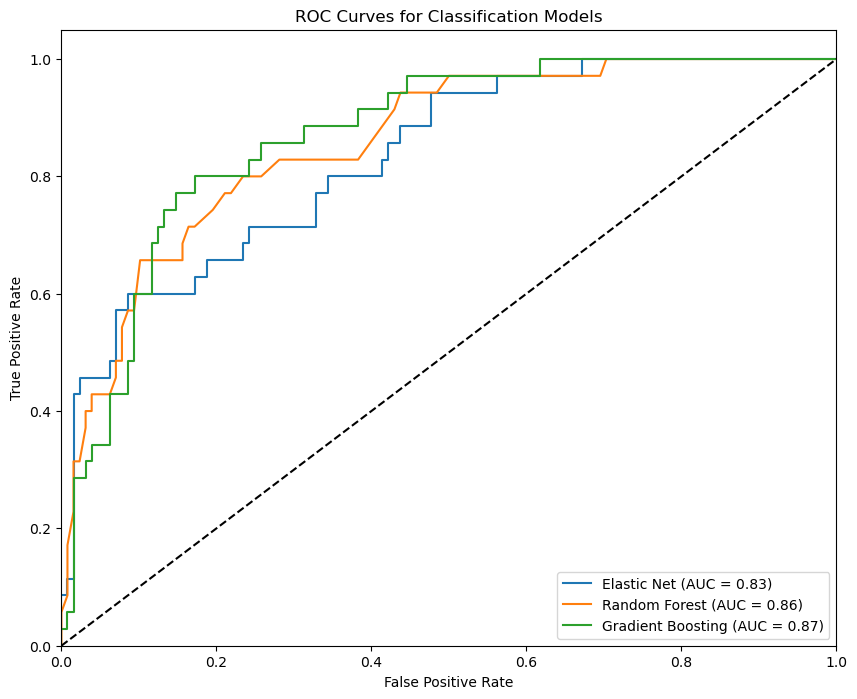

NameError: name 'Sequential' is not defined

In [62]:
# Data Preprocessing Function
def preprocess_data(X, y, task='classification'):
    # Encode categorical labels
    if task == 'classification':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Model Training & Evaluation Function for Classification
def train_evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        
        # Store results
        results[name] = {
            'AUC': roc_auc,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred)
        }
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Classification Models')
    plt.legend(loc="lower right")
    plt.show()
    
    return results


# Main execution
def main():
    # For top 2% expressed genes
    print("Training models on top 2% expressed genes:")
    
    # Classification
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['HRD_status_base'], task='classification'
    )
    
    results_top = train_evaluate_classification_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    
    # Neural Network
    nn_model_top = create_nn_classifier(rnaseq_df_top_genes.shape[1])
    history_top = nn_model_top.fit(
        X_train_top, y_train_top,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        verbose=0
    )
    
    # For differentially expressed genes
    print("\nTraining models on differentially expressed genes:")
    
    X_train_de, X_test_de, y_train_de, y_test_de = preprocess_data(
        deseq_filtered_rna_seq_df,brca_df_common['HRD_status_base'], task='classification'
    )
    
    results_de = train_evaluate_classification_models(
        X_train_de, X_test_de, y_train_de, y_test_de
    )
    
    # Print results
    print("\nResults for top 2% expressed genes:")
    for model_name, metrics in results_top.items():
        print(f"\n{model_name}:")
        print(f"AUC: {metrics['AUC']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
    
    print("\nResults for differentially expressed genes:")
    for model_name, metrics in results_de.items():
        print(f"\n{model_name}:")
        print(f"AUC: {metrics['AUC']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])

# For regression task on Confidence values
def train_evaluate_regression_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': ElasticNet(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'MSE': mse,
            'R2': r2
        }
        
        # Plot actual vs predicted
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Confidence')
        plt.ylabel('Predicted Confidence')
        plt.title(f'{name} - Actual vs Predicted')
        plt.show()
    
    return results

# Run regression models
def run_regression():
    print("\nTraining regression models for Confidence prediction:")
    
    # For top 2% expressed genes
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, md['Confidence'], task='regression'
    )
    
    results_top_reg = train_evaluate_regression_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    
    print("\nRegression Results for top 2% expressed genes:")
    for model_name, metrics in results_top_reg.items():
        print(f"\n{model_name}:")
        print(f"MSE: {metrics['MSE']:.6f}")
        print(f"R2: {metrics['R2']:.3f}")


main()
run_regression()

Training models on top 2% expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


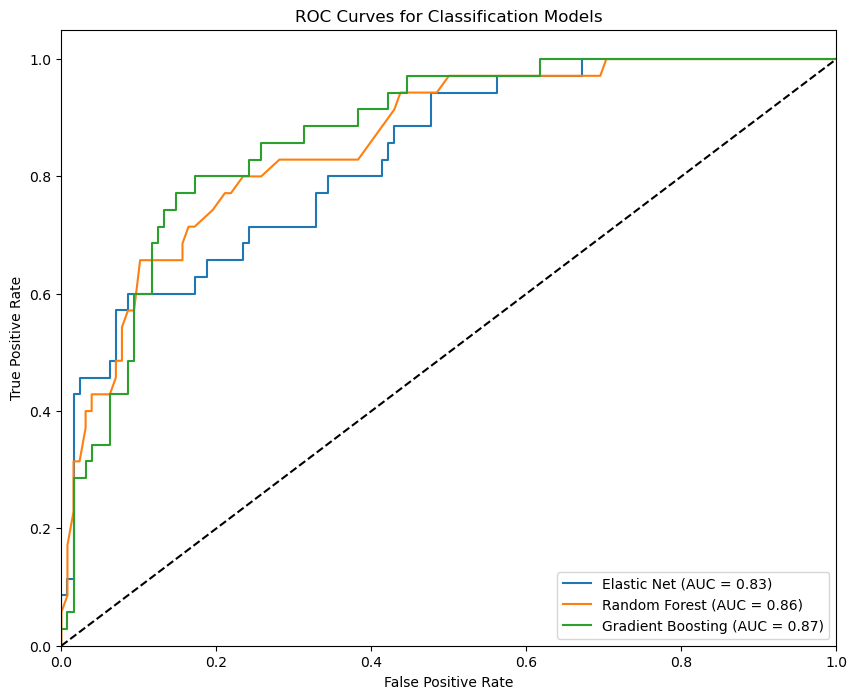


Training models on differentially expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


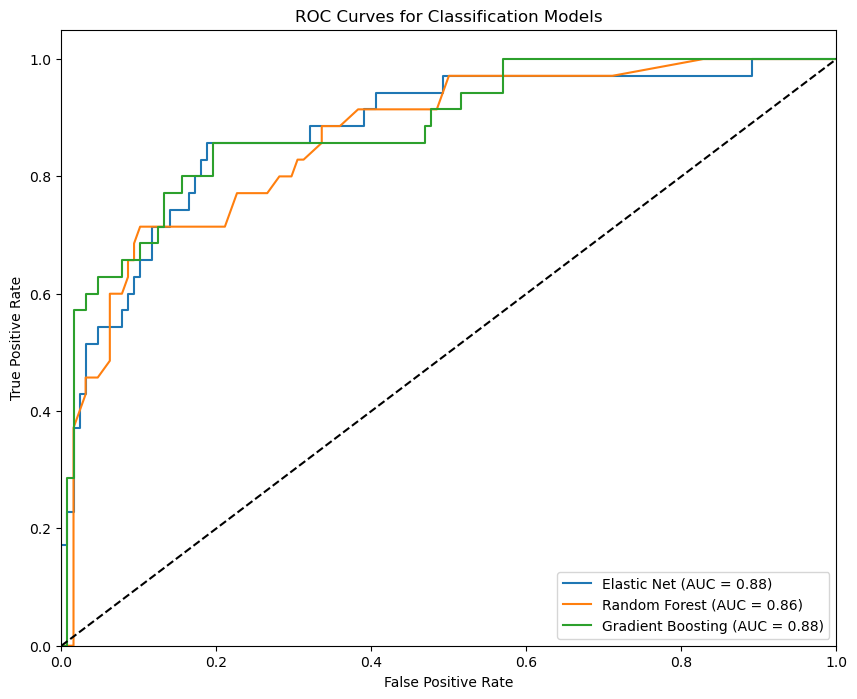


Results for top 2% expressed genes:

Elastic Net:
AUC: 0.833

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       128
           1       0.65      0.57      0.61        35

    accuracy                           0.84       163
   macro avg       0.77      0.74      0.75       163
weighted avg       0.83      0.84      0.84       163


Confusion Matrix:
[[117  11]
 [ 15  20]]

Random Forest:
AUC: 0.859

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       128
           1       0.63      0.49      0.55        35

    accuracy                           0.83       163
   macro avg       0.75      0.70      0.72       163
weighted avg       0.82      0.83      0.82       163


Confusion Matrix:
[[118  10]
 [ 18  17]]

Gradient Boosting:
AUC: 0.870

Classification Report:
              precision    recall  f1-score   support

           0   

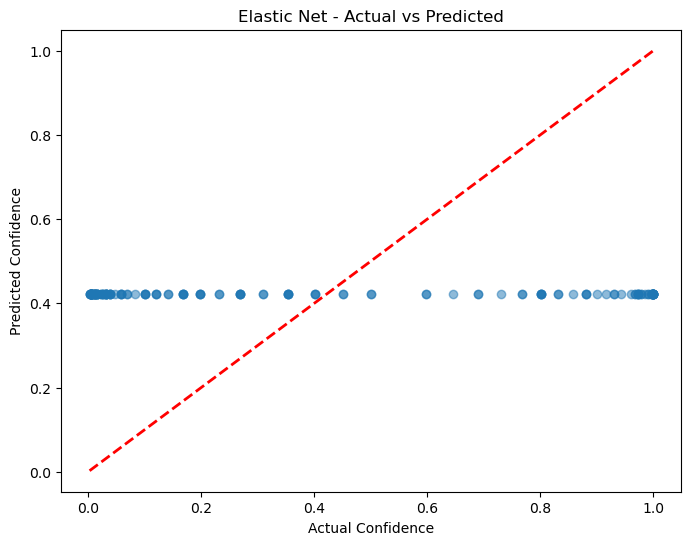

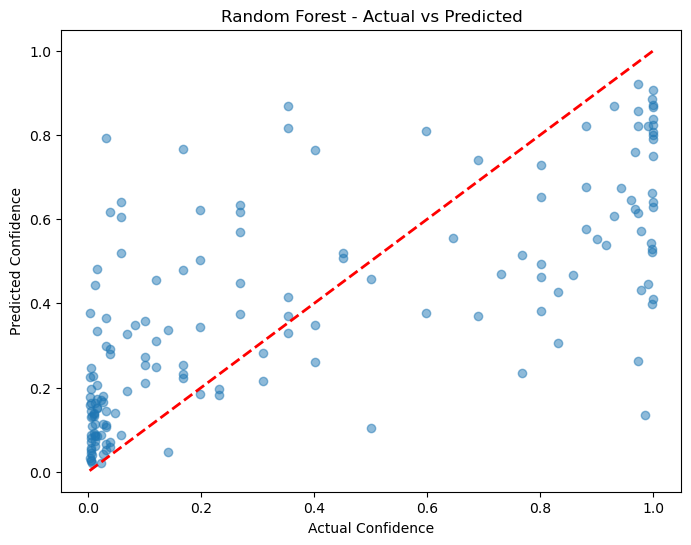

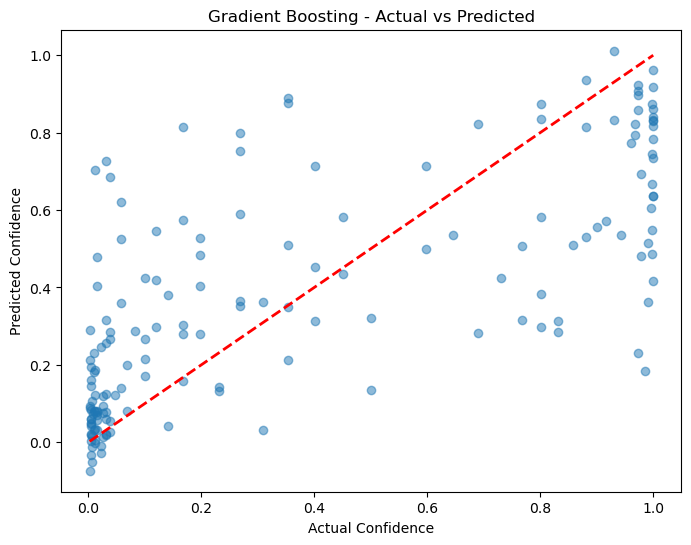


Regression Results for top 2% expressed genes:

Elastic Net:
MSE: 0.162171
R2: -0.013

Random Forest:
MSE: 0.077047
R2: 0.519

Gradient Boosting:
MSE: 0.076071
R2: 0.525


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Function
def preprocess_data(X, y, task='classification'):
    # Encode categorical labels
    if task == 'classification':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Model Training & Evaluation Function for Classification
def train_evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
        
        # Store results
        results[name] = {
            'AUC': roc_auc,
            'Confusion Matrix': confusion_matrix(y_test, y_pred),
            'Classification Report': classification_report(y_test, y_pred)
        }
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Classification Models')
    plt.legend(loc="lower right")
    plt.show()
    
    return results

# Main execution
def main():
    # For top 2% expressed genes
    print("Training models on top 2% expressed genes:")
    
    # Classification
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['HRD_status_base'], task='classification'
    )
    
    results_top = train_evaluate_classification_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    
    # For differentially expressed genes
    print("\nTraining models on differentially expressed genes:")
    
    X_train_de, X_test_de, y_train_de, y_test_de = preprocess_data(
        deseq_filtered_rna_seq_df, brca_df_common['HRD_status_base'], task='classification'
    )
    
    results_de = train_evaluate_classification_models(
        X_train_de, X_test_de, y_train_de, y_test_de
    )
    
    # Print results
    print("\nResults for top 2% expressed genes:")
    for model_name, metrics in results_top.items():
        print(f"\n{model_name}:")
        print(f"AUC: {metrics['AUC']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])
    
    print("\nResults for differentially expressed genes:")
    for model_name, metrics in results_de.items():
        print(f"\n{model_name}:")
        print(f"AUC: {metrics['AUC']:.3f}")
        print("\nClassification Report:")
        print(metrics['Classification Report'])
        print("\nConfusion Matrix:")
        print(metrics['Confusion Matrix'])

# For regression task on Confidence values
def train_evaluate_regression_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': ElasticNet(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[name] = {
            'MSE': mse,
            'R2': r2
        }
        
        # Plot actual vs predicted
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Confidence')
        plt.ylabel('Predicted Confidence')
        plt.title(f'{name} - Actual vs Predicted')
        plt.show()
    
    return results

# Run regression models
def run_regression():
    print("\nTraining regression models for Confidence prediction:")
    
    # For top 2% expressed genes
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['Confidence'], task='regression'
    )
    
    results_top_reg = train_evaluate_regression_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    
    print("\nRegression Results for top 2% expressed genes:")
    for model_name, metrics in results_top_reg.items():
        print(f"\n{model_name}:")
        print(f"MSE: {metrics['MSE']:.6f}")
        print(f"R2: {metrics['R2']:.3f}")

main()
run_regression()

Training models on top 2% expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


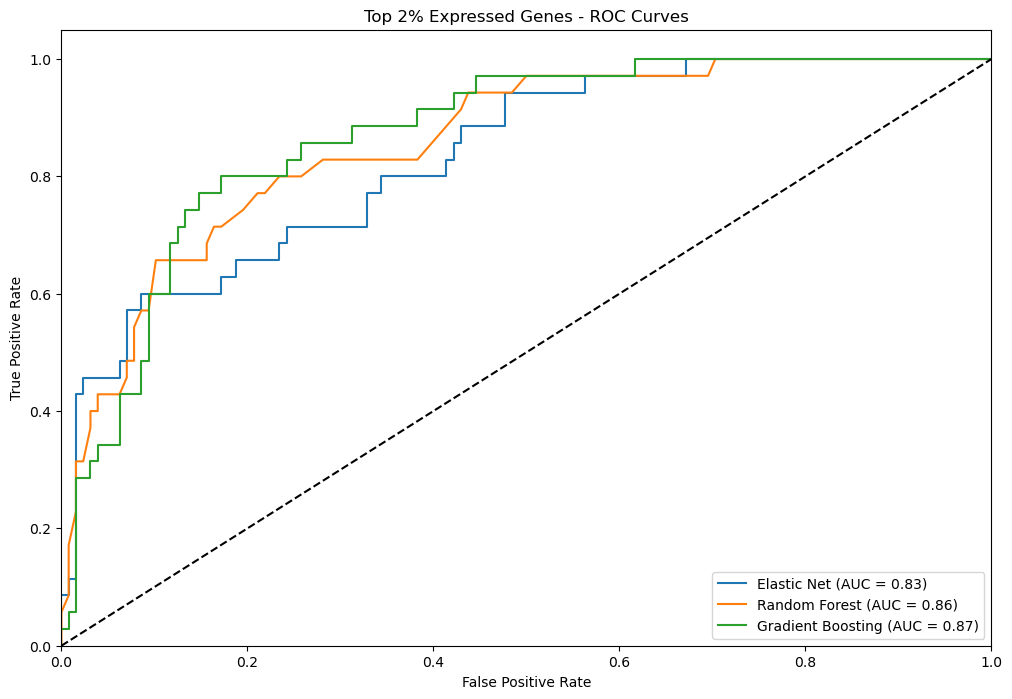

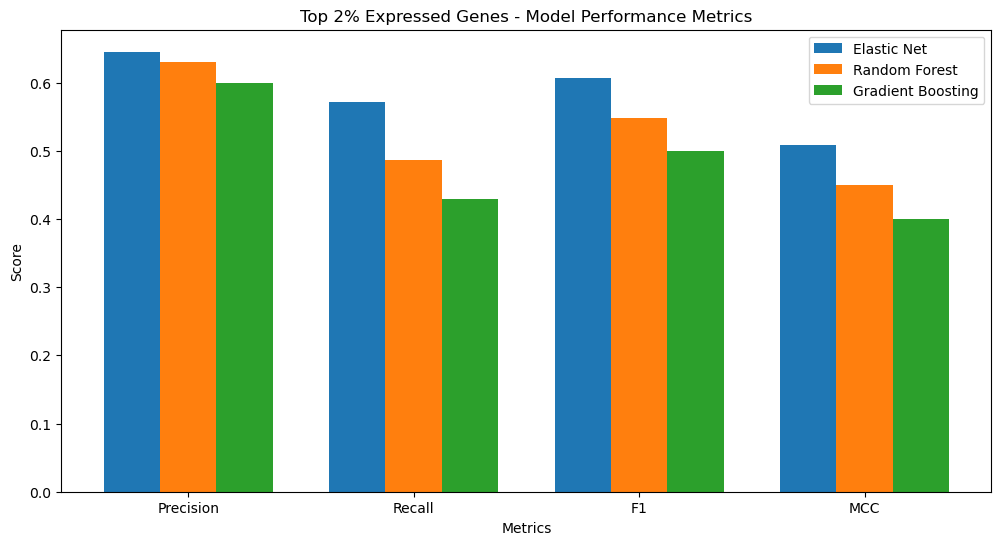

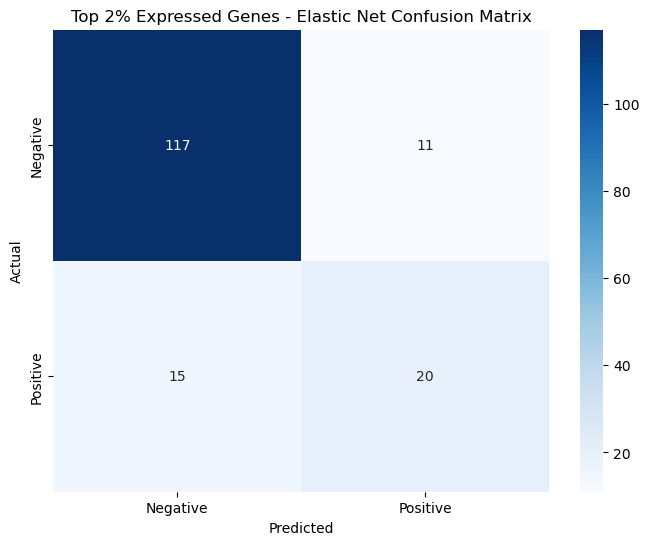

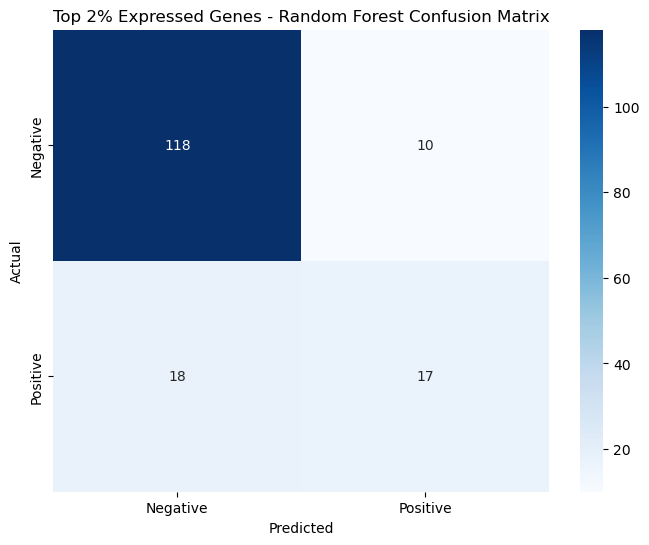

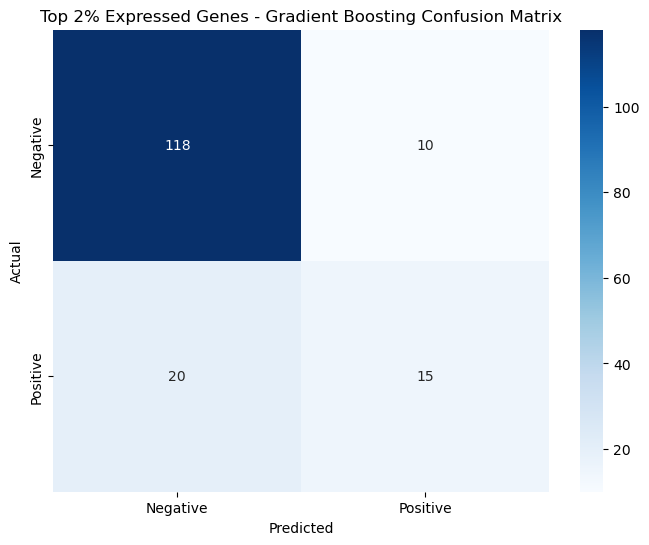


Training models on differentially expressed genes:


/opt/homebrew/Caskroom/miniconda/base/envs/hrdclas/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


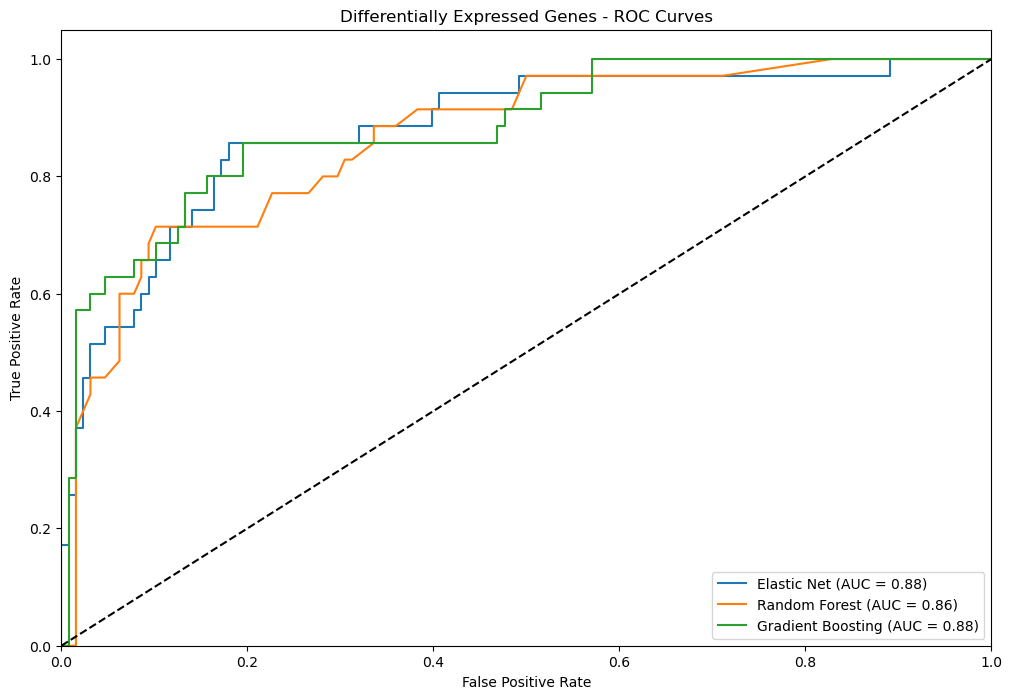

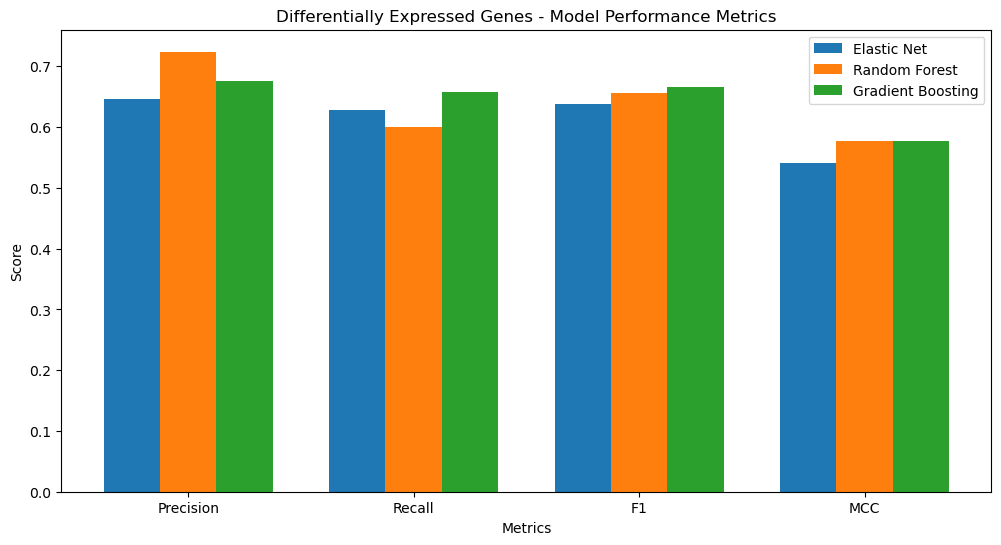

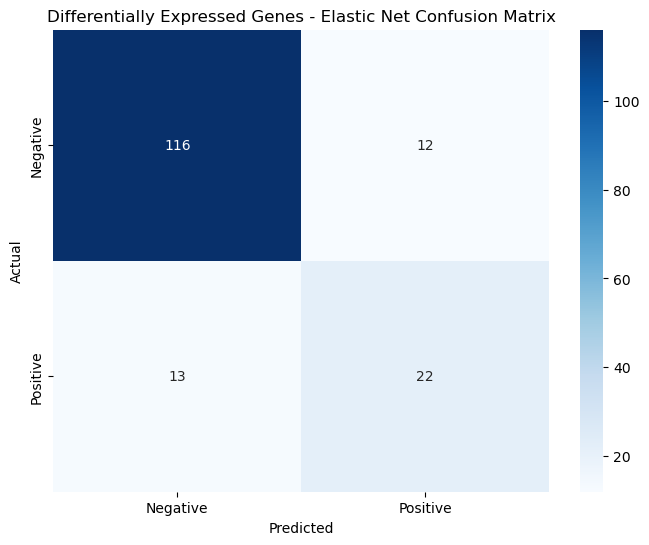

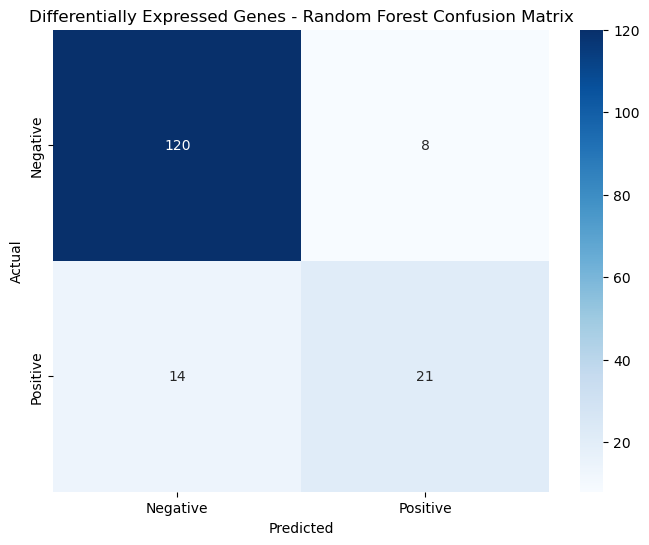

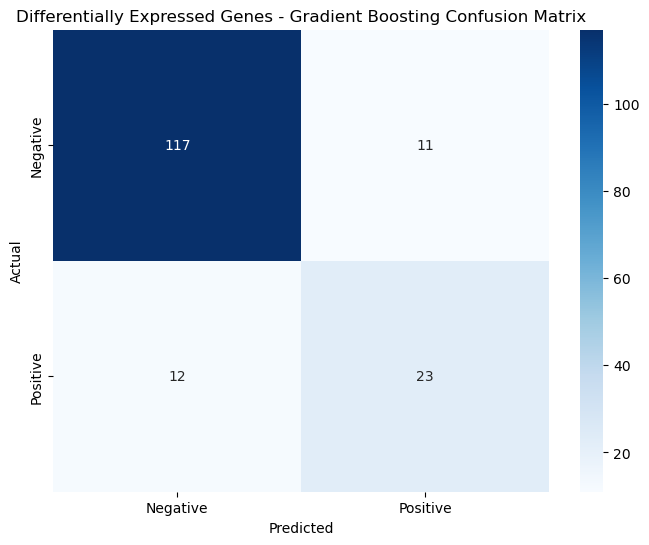


Results for Top 2% expressed genes:

Elastic Net:
Precision: 0.645
Recall: 0.571
F1: 0.606
MCC: 0.508
AUC: 0.833

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       128
           1       0.65      0.57      0.61        35

    accuracy                           0.84       163
   macro avg       0.77      0.74      0.75       163
weighted avg       0.83      0.84      0.84       163


Random Forest:
Precision: 0.630
Recall: 0.486
F1: 0.548
MCC: 0.450
AUC: 0.859

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       128
           1       0.63      0.49      0.55        35

    accuracy                           0.83       163
   macro avg       0.75      0.70      0.72       163
weighted avg       0.82      0.83      0.82       163


Gradient Boosting:
Precision: 0.600
Recall: 0.429
F1: 0.500
MCC: 0.399
AUC: 0.870

Classification Report

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (roc_curve, auc, confusion_matrix, classification_report,
                           precision_score, recall_score, f1_score, matthews_corrcoef)
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(X, y, task='classification'):
    if task == 'classification':
        le = LabelEncoder()
        y = le.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Confusion Matrix': confusion_matrix(y_true, y_pred),
        'Classification Report': classification_report(y_true, y_pred)
    }
    
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        metrics['ROC'] = {'fpr': fpr, 'tpr': tpr, 'auc': auc(fpr, tpr)}
    
    return metrics

def plot_metrics(results, title_prefix=""):
    # Plot ROC curves
    plt.figure(figsize=(12, 8))
    for name, metrics in results.items():
        roc = metrics['ROC']
        plt.plot(roc['fpr'], roc['tpr'], 
                label=f'{name} (AUC = {roc["auc"]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title_prefix} ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

    # Plot other metrics as bar chart
    metrics_to_plot = ['Precision', 'Recall', 'F1', 'MCC']
    metrics_data = {
        name: [metrics[m] for m in metrics_to_plot] 
        for name, metrics in results.items()
    }
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(metrics_to_plot))
    width = 0.25
    
    for i, (model_name, values) in enumerate(metrics_data.items()):
        plt.bar(x + i*width, values, width, label=model_name)
    
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title(f'{title_prefix} Model Performance Metrics')
    plt.xticks(x + width, metrics_to_plot)
    plt.legend()
    plt.show()

    # Plot confusion matrices
    for name, metrics in results.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title(f'{title_prefix} {name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

def train_evaluate_classification_models(X_train, X_test, y_train, y_test):
    models = {
        'Elastic Net': LogisticRegression(penalty='elasticnet', solver='saga', 
                                        l1_ratio=0.5, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        y_pred = model.predict(X_test)
        
        # Calculate all metrics
        results[name] = calculate_metrics(y_test, y_pred, y_pred_proba)
    
    return results

def main():
    # For top 2% expressed genes
    print("Training models on top 2% expressed genes:")
    X_train_top, X_test_top, y_train_top, y_test_top = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['HRD_status_base']
    )
    
    results_top = train_evaluate_classification_models(
        X_train_top, X_test_top, y_train_top, y_test_top
    )
    plot_metrics(results_top, "Top 2% Expressed Genes -")
    
    # For differentially expressed genes
    print("\nTraining models on differentially expressed genes:")
    X_train_de, X_test_de, y_train_de, y_test_de = preprocess_data(
        deseq_filtered_rna_seq_df, brca_df_common['HRD_status_base']
    )
    
    results_de = train_evaluate_classification_models(
        X_train_de, X_test_de, y_train_de, y_test_de
    )
    plot_metrics(results_de, "Differentially Expressed Genes -")
    
    # Print detailed results
    for dataset_name, results in [("Top 2% expressed genes", results_top), 
                                ("Differentially expressed genes", results_de)]:
        print(f"\nResults for {dataset_name}:")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            print(f"Precision: {metrics['Precision']:.3f}")
            print(f"Recall: {metrics['Recall']:.3f}")
            print(f"F1: {metrics['F1']:.3f}")
            print(f"MCC: {metrics['MCC']:.3f}")
            print(f"AUC: {metrics['ROC']['auc']:.3f}")
            print("\nClassification Report:")
            print(metrics['Classification Report'])

if __name__ == "__main__":
    main()

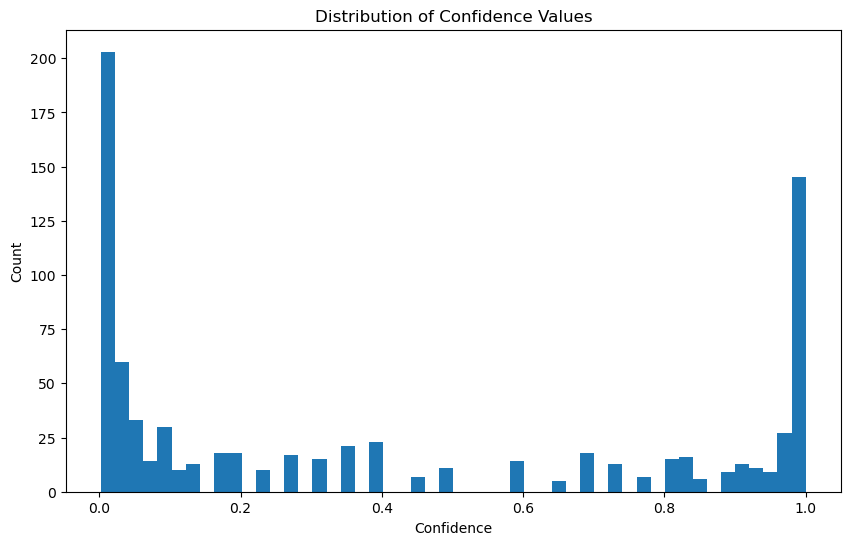


Preparing data...


IndexError: index -1 is out of bounds for axis 0 with size 0

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def identify_high_confidence_samples(confidence_values, threshold_percentile=10):
    """
    Identify high-confidence samples from both ends of the sigmoid distribution
    """
    lower_threshold = np.percentile(confidence_values, threshold_percentile)
    upper_threshold = np.percentile(confidence_values, 100-threshold_percentile)
    
    return (confidence_values <= lower_threshold) | (confidence_values >= upper_threshold)

def preprocess_data(X, confidence_values, threshold_percentile=10):
    """
    Preprocess data using only high confidence samples for training
    """
    # Make sure X and confidence_values have same index
    X = X.copy()
    confidence_values = confidence_values.copy()
    
    # Ensure indices match
    common_index = X.index.intersection(confidence_values.index)
    X = X.loc[common_index]
    confidence_values = confidence_values.loc[common_index]
    
    # Identify high confidence samples
    high_confidence_mask = identify_high_confidence_samples(confidence_values, threshold_percentile)
    
    # Split data into training (high confidence) and validation (remaining) sets
    X_high_conf = X[high_confidence_mask]
    y_high_conf = confidence_values[high_confidence_mask]
    X_ambiguous = X[~high_confidence_mask]
    y_ambiguous = confidence_values[~high_confidence_mask]
    
    # Further split high confidence data into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_high_conf, y_high_conf, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_ambiguous_scaled = scaler.transform(X_ambiguous)
    
    # Convert to dataframes with proper index
    X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)
    X_ambiguous_scaled = pd.DataFrame(X_ambiguous_scaled, index=X_ambiguous.index, columns=X_ambiguous.columns)
    
    return (X_train_scaled, X_test_scaled, X_ambiguous_scaled, 
            y_train, y_test, y_ambiguous)

def train_evaluate_models(X_train, X_test, X_ambiguous, y_train, y_test, y_ambiguous):
    """
    Train and evaluate models using soft labels
    """
    models = {
        'Linear Regression': LinearRegression(),
        'Elastic Net': ElasticNet(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Train model
        model.fit(X_train, y_train)
        
        # Get predictions for test and ambiguous sets
        y_pred_test = model.predict(X_test)
        y_pred_ambiguous = model.predict(X_ambiguous)
        
        # Calculate metrics
        test_mse = mean_squared_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)
        
        # Store results
        results[name] = {
            'Test MSE': test_mse,
            'Test R2': test_r2,
            'Test Predictions': y_pred_test,
            'Ambiguous Predictions': y_pred_ambiguous
        }
        
        # Plot actual vs predicted for test set
        plt.figure(figsize=(15, 5))
        
        # Test set predictions
        plt.subplot(1, 3, 1)
        plt.scatter(y_test, y_pred_test, alpha=0.5)
        plt.plot([0, 1], [0, 1], 'r--', lw=2)
        plt.xlabel('Actual Confidence')
        plt.ylabel('Predicted Confidence')
        plt.title(f'{name} - Test Set Predictions')
        
        # Ambiguous set predictions
        plt.subplot(1, 3, 2)
        plt.hist(y_pred_ambiguous, bins=50, alpha=0.5)
        plt.xlabel('Predicted Confidence')
        plt.ylabel('Count')
        plt.title(f'{name} - Ambiguous Set Predictions')
        
        # ROC curve
        fpr, tpr, _ = roc_curve((y_test > 0.5).astype(int), y_pred_test)
        roc_auc = auc(fpr, tpr)
        
        plt.subplot(1, 3, 3)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed results
        print(f"\n{name} Results:")
        print(f"Test MSE: {test_mse:.6f}")
        print(f"Test R2: {test_r2:.3f}")
        print(f"ROC-AUC: {roc_auc:.3f}")
        print("\nAmbiguous Predictions Summary:")
        print(f"Mean: {np.mean(y_pred_ambiguous):.3f}")
        print(f"Std: {np.std(y_pred_ambiguous):.3f}")
        print(f"% Predicted HRD (>0.5): {(y_pred_ambiguous > 0.5).mean()*100:.1f}%")
        
    return results

def main():
    # First, let's look at the confidence distribution
    plt.figure(figsize=(10, 6))
    plt.hist(brca_df_common['Confidence'], bins=50)
    plt.title('Distribution of Confidence Values')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.show()
    
    print("\nPreparing data...")
    # Identify high confidence samples and prepare data
    X_train, X_test, X_ambiguous, y_train, y_test, y_ambiguous = preprocess_data(
        rnaseq_df_top_genes, brca_df_common['Confidence']
    )
    
    print(f"\nData split sizes:")
    print(f"Training set: {len(X_train)}")
    print(f"Test set: {len(X_test)}")
    print(f"Ambiguous set: {len(X_ambiguous)}")
    
    # Train and evaluate models
    results = train_evaluate_models(
        X_train, X_test, X_ambiguous,
        y_train, y_test, y_ambiguous
    )
    
    return results


results = main()

In [26]:
# Check data alignment and print diagnostic information
print("rnaseq_df_top_genes shape:", pcg_400_with_metadata.shape)
print("brca_df_common['Confidence'] shape:", brca_df_common['Confidence'].shape)
print("\nrnaseq_df_top_genes index (first 5):", pcg_400_with_metadata.index[:5].tolist())
print("brca_df_common['Confidence'] index (first 5):", brca_df_common['Confidence'].index[:5].tolist())

# Check for common samples
common_samples = set(pcg_400_with_metadata.index) & set(brca_df_common.index)
print("\nNumber of common samples:", len(common_samples))

rnaseq_df_top_genes shape: (811, 403)
md['Confidence'] shape: (811,)

rnaseq_df_top_genes index (first 5): [0, 1, 3, 4, 5]
md['Confidence'] index (first 5): ['TCGA-A1-A0SB', 'TCGA-A1-A0SD', 'TCGA-A1-A0SE', 'TCGA-A1-A0SF', 'TCGA-A1-A0SG']

Number of common samples: 0
